# Name : Aditya Nitin Pise.
# Organization : The Sparks Foundation

## Task 5 : Exploratory Data Analysis - Sports

- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ 
- As a sports analysts, find out the most successful teams, players and factors 
contributing win or loss of a team. 
- Suggest teams or players a company should endorse for its products

## Step 1 : Imprting libraries and dataset

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
params = {
              'axes.titlesize' : 40,
              'axes.labelsize' : 35,
              'xtick.labelsize' : 15,
              'ytick.labelsize' : 15,
              'legend.fontsize' : 15,
              'font.size': 22
            }
plt.rcParams.update(params)

%matplotlib inline

In [275]:
dataset = pd.read_csv("matches.csv")
dataset.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [276]:
dataset.shape

(756, 18)

In [277]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [278]:
dataset.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [279]:
dataset['season'].value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: season, dtype: int64

1. The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
2. The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
3. There were 756 ipl matches hosted between 2008 to 2019

In [280]:
dataset.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

- The column umpire3 has 637 null values. Contribution of umpire is insignificant in result of a match so we drop this column.
- For other columns number of null values is small(<=7).  

In [281]:
dataset = dataset.drop(columns=['umpire3'], axis=1)

In [282]:
wins_per_season = dataset.groupby('season')['winner'].value_counts()

win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in wins_per_season.iteritems():    
    win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
    win_per_season_df = win_per_season_df.append(win_series)
most_wins_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


<AxesSubplot:title={'center':'Most Wins per season'}, xlabel='team', ylabel='wins'>

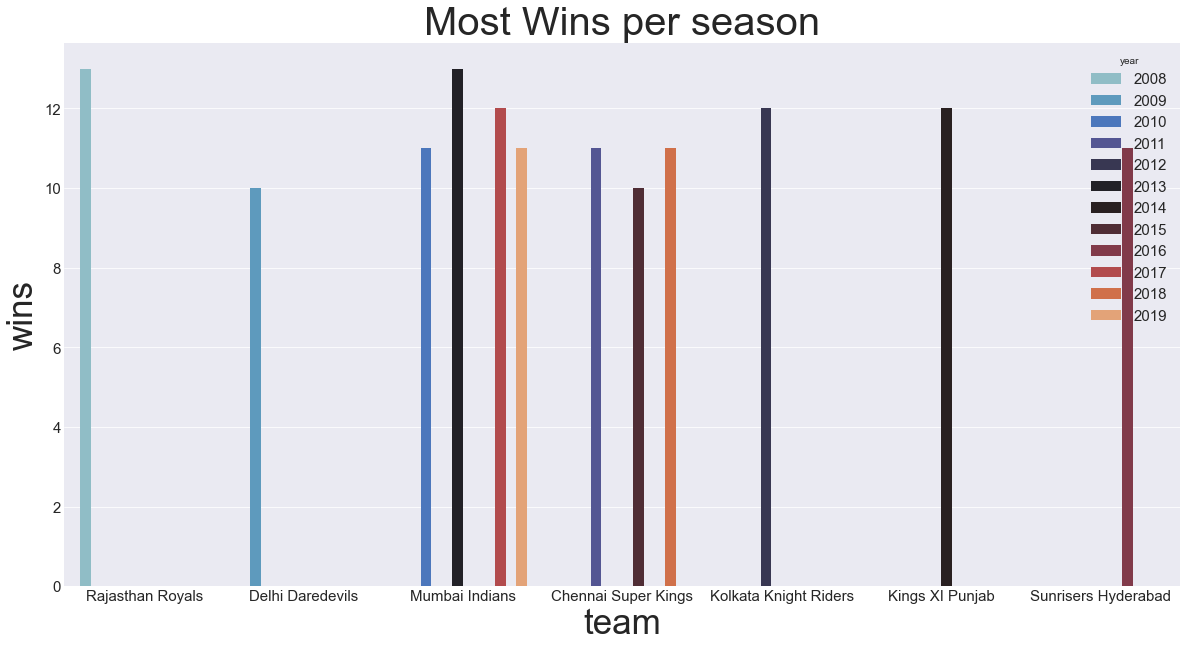

In [283]:
plt.rcParams["figure.figsize"] = [20,10]
plt.title("Most Wins per season")
sns.barplot(x ='team', y='wins', hue='year', data=wins_per_season_df, palette='icefire') 

1. Mumbai Indians has secured most wins in four seasons(2010, 2013, 2017, 2019).
2. We can see that 8/12 times the team which has won the most matches in the season also won the trophy that season.

In [284]:
max_venue = dataset["venue"].value_counts()
max_venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in max_venue.iteritems():
        temp_df = pd.DataFrame({
            'venue': [items[0]],
            'matches': [items[1]]
            })
        max_venue_df = max_venue_df.append(temp_df, ignore_index=True)
max_venue_df

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


In [285]:
max_venue_df.shape

(41, 2)

1. Eden gardens(77) hosted most number of matches followed by Wankhede stadium(73) and M Chinnaswamy Stadium(73) between 2008-2019.
2. Between 2008-2019, Ipl matches were hosted by 41 venues.

In [286]:
max_team_wins = dataset['winner'].value_counts()

max_team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in max_team_wins.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    max_team_wins_df = max_team_wins_df.append(temp_df1, ignore_index=True)
max_team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


<AxesSubplot:title={'center':'Total victories by IPL teams'}, xlabel='wins', ylabel='team'>

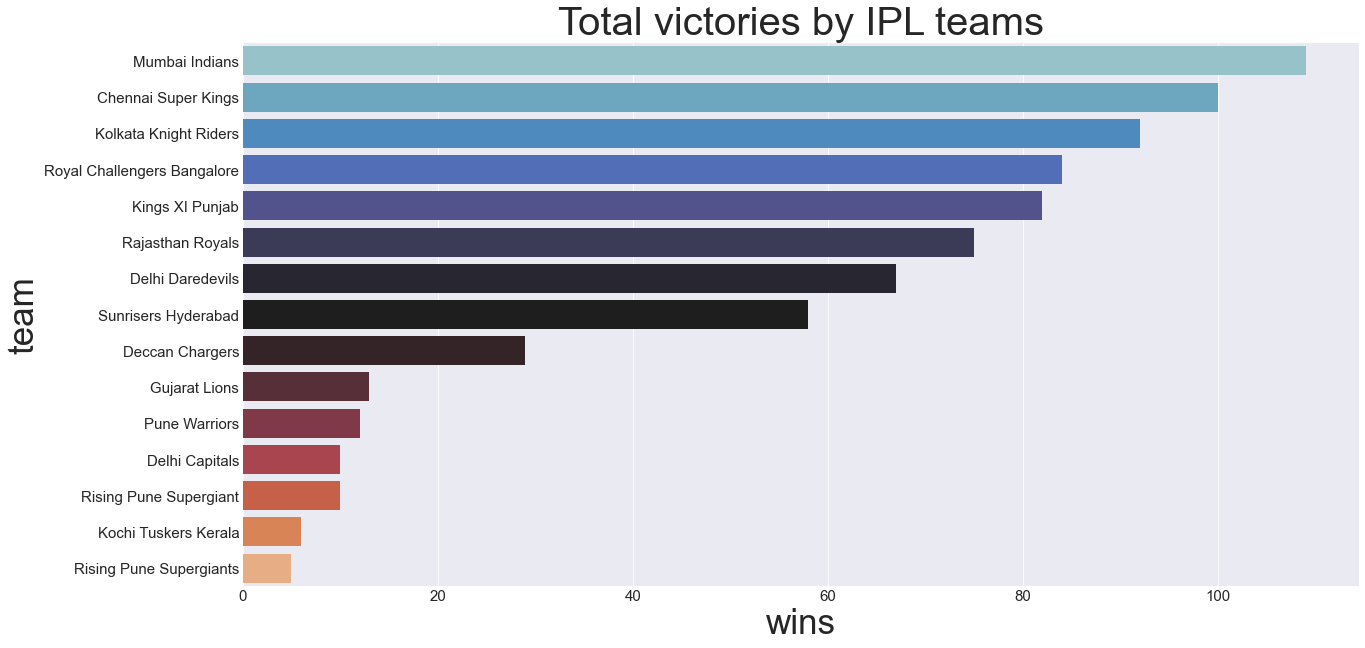

In [287]:
plt.rcParams["figure.figsize"] = [20,10]
plt.title("Total victories by IPL teams")
sns.barplot(x ='wins', y='team', data=max_team_wins_df,palette='icefire') 

1. Mumbai Indians(109) is the most successful team in IPL(2008-2019) followed by Chennai Super Kings(100) and Kolkata Knight Riders(92).

In [288]:
max_toss = dataset['toss_winner'].value_counts().sort_values(ascending = False)
max_toss_df = pd.DataFrame(columns=["team", "wins"])

for items in max_toss.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    max_toss_df = max_toss_df.append(temp_df3, ignore_index=True)
max_toss_df


,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Rajasthan Royals,80
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


<AxesSubplot:title={'center':'Most Toss wins'}, xlabel='wins', ylabel='team'>

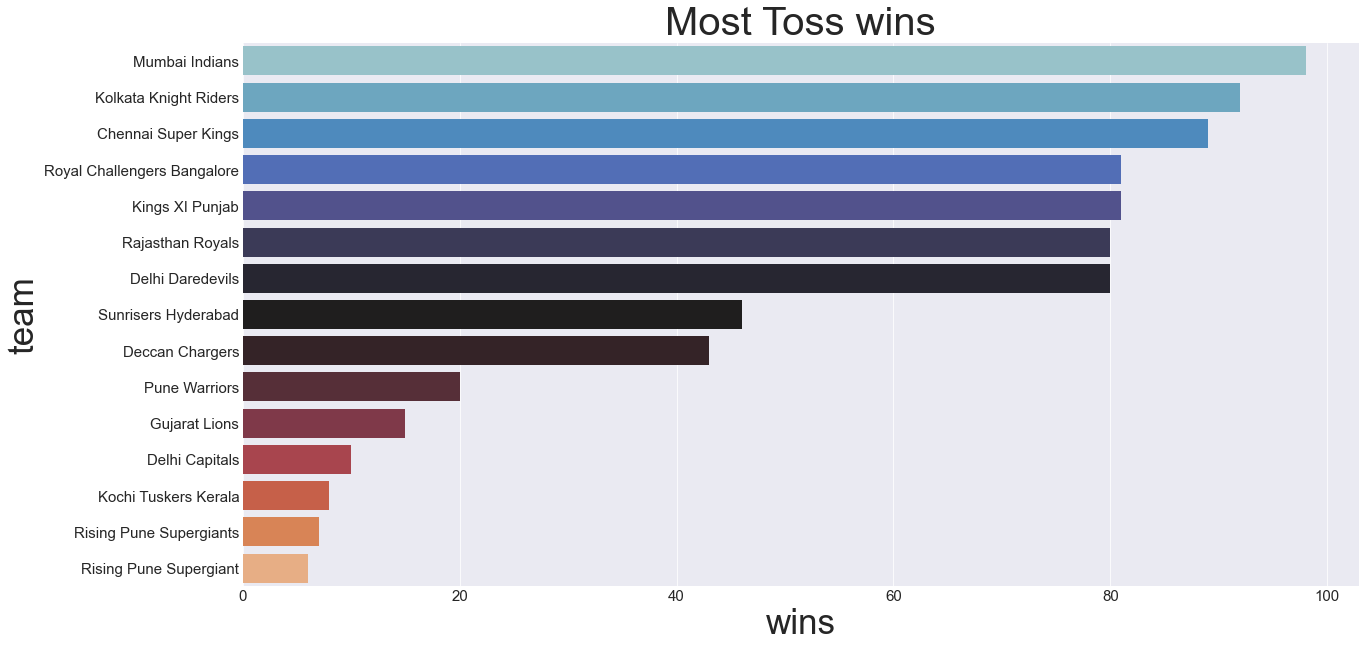

In [289]:
plt.rcParams["figure.figsize"] = [20,10]
plt.title("Most Toss wins")
sns.barplot(x='wins', y= 'team', data=max_toss_df, palette='icefire')

1. Mumbai Indians has won the most tosses in IPL history.
2. The top 3 most successful teams are also top 3 team with most toss wins. **So can we say that winning the toss is crucial for winning the match?**
**Lets check**


Text(0.5, 1.0, 'Decision after winning toss')

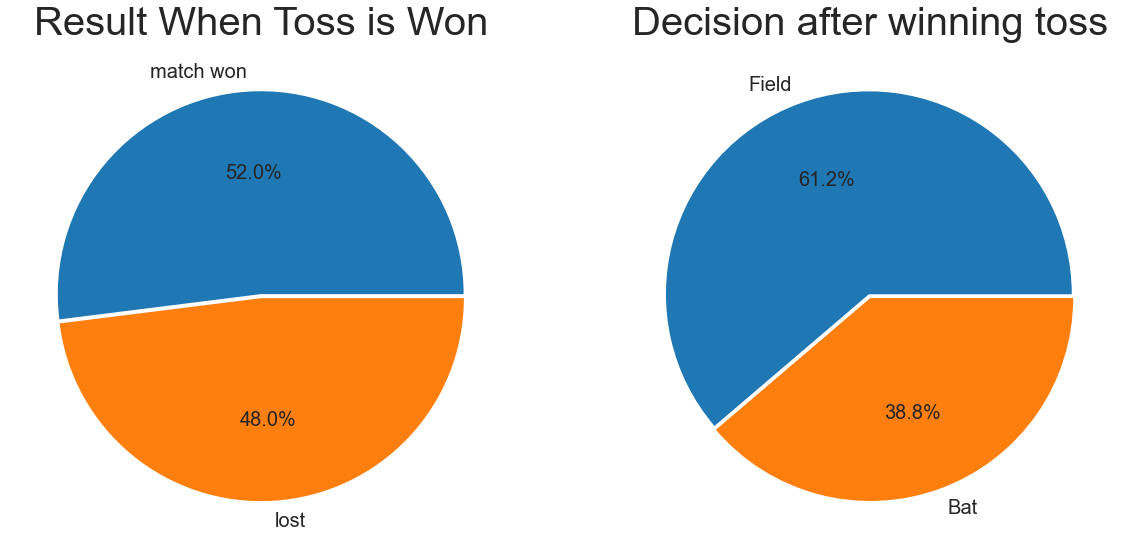

In [314]:
win_count = 0
lost_count = 0

win_field = 0
win_bat = 0


for index, value in dataset.iterrows():
    if(value['toss_winner']==value['winner']):
        win_count += 1
    if(value['toss_winner']!=value['winner']):
        lost_count += 1
    if(value['toss_decision']=='field'):
        win_field += 1
    if(value['toss_decision']=='bat'):
        win_bat += 1
        

prob_win = win_count/len(dataset)
prob_lost = lost_count/len(dataset)

win_field = win_field/len(dataset)
win_bat = win_bat/len(dataset)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

toss1 = [prob_win, prob_lost]
my_labels1 = ['match won', 'lost']
my_explode = [0.01, 0.01]
ax1.pie(toss1, labels = my_labels1, autopct='%1.1f%%', explode = my_explode, textprops={'fontsize': 20})
ax1.set_title('Result When Toss is Won')


toss2 = [win_field, win_bat]
my_labels2 = ['Field', 'Bat']
my_explode = [0.01, 0.01]
ax2.pie(toss2, labels = my_labels2, autopct='%1.1f%%', explode = my_explode, textprops={'fontsize': 20})
ax2.set_title('Decision after winning toss')

1. **The percentage of winning if won the toss is 52%. So we can say that toss does not play crucial role in winning the matches.**
2. **The percentage of choosing field first after winning the toss is 61.2%.**

In [291]:
max_mvp_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in max_mvp.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        max_mvp_df = max_mvp_df.append(temp_df2, ignore_index=True)
        count += 1   
max_mvp_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,RG Sharma,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


<AxesSubplot:title={'center':'Top Ten IPL Players'}, xlabel='wins', ylabel='player'>

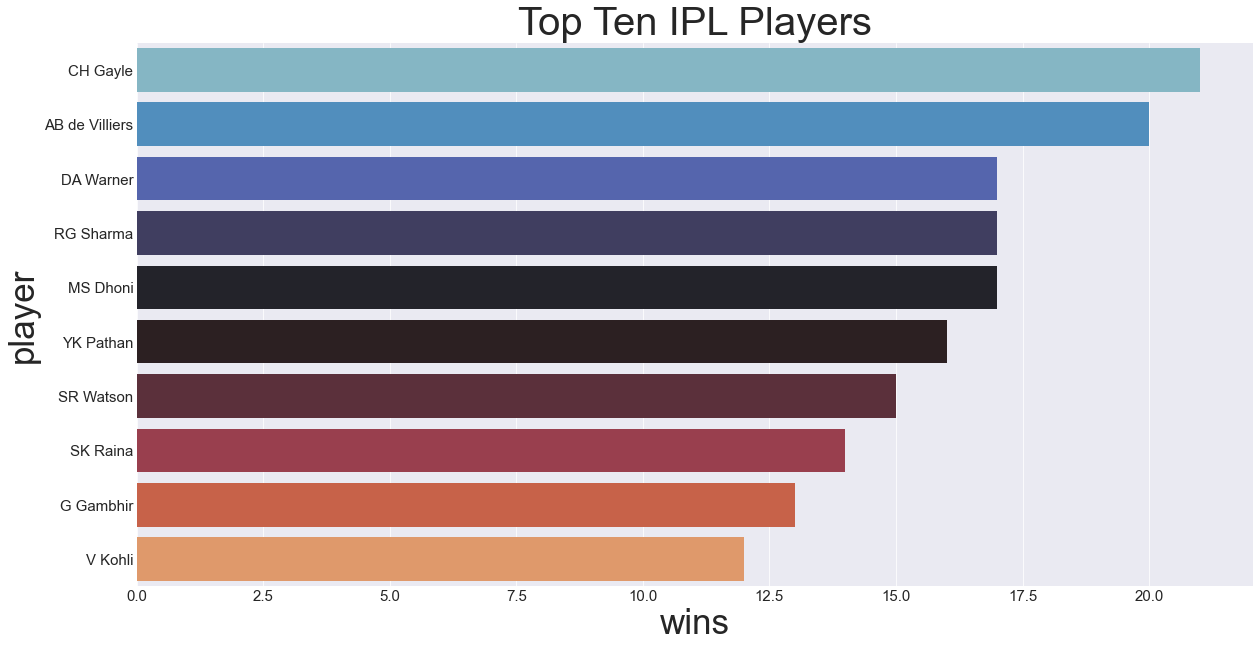

In [292]:
plt.rcParams["figure.figsize"] = [20,10]
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=max_mvp_df, palette='icefire')

1. Cris Gayle is the player who won the most player of the match awards and hence Chris Gayle is the most valuable player.
2. Six Indian players have figured in the top ten IPL players list.
3. Top 3 players are foreign players.